In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from scipy.stats import norm
from sklearn import metrics

In [2]:
df=pd.read_csv('E:/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#the outcome represent the person has diabetes or not 

## cleaning

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Eda

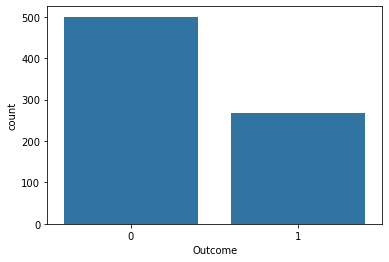

In [8]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Outcome', color = base_color);

As we can see that the count of non-diabetes patient has high than diabetes patient

C:\Users\sarvesh s\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


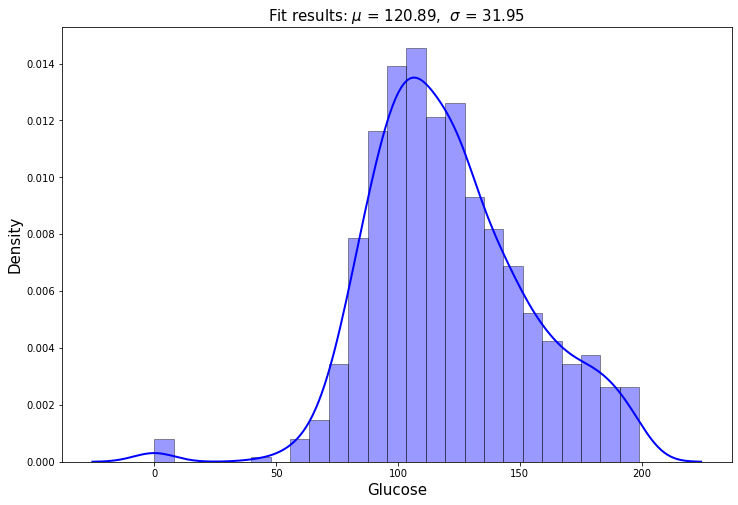

In [9]:
mu, std = norm.fit(df['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Glucose'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

from this we can say that the glucose value accross the patients in our sample is slightly normally distributes

C:\Users\sarvesh s\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


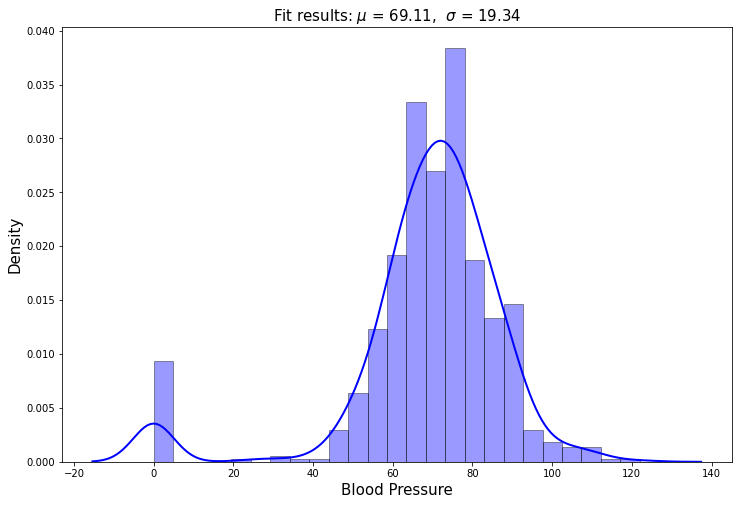

In [10]:
mu, std = norm.fit(df['BloodPressure'])
plt.figure(figsize = [12, 8])
sns.distplot(df['BloodPressure'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Blood Pressure", size=15)
plt.ylabel("Density", size=15);

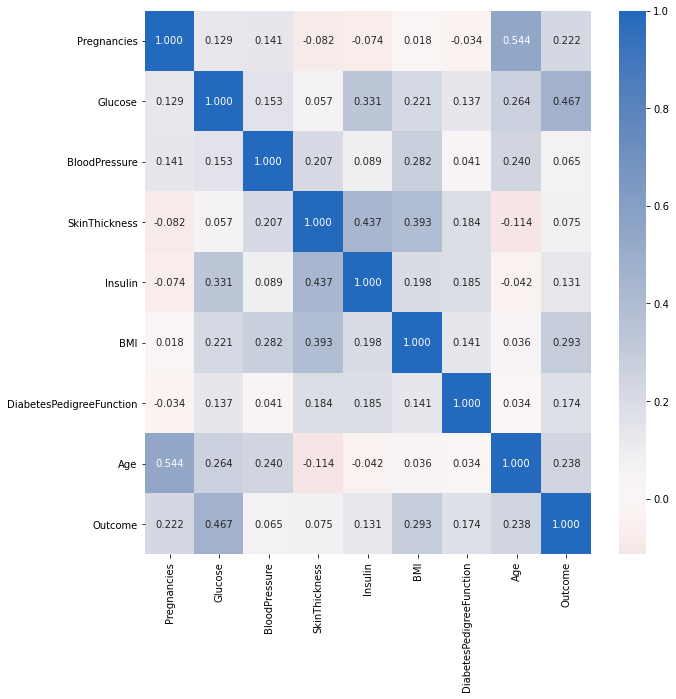

In [11]:
plt.figure(figsize = [10, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

the above map represent the correlation b/w the variables

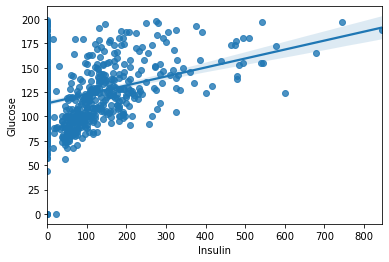

In [12]:
sns.regplot(data=df, x='Insulin', y='Glucose')
plt.xlabel('Insulin')
plt.ylabel('Glucose');

the above was the regression plot as the insulin increases in will leads to increase in glucose level in their body

## logistic regression

In [13]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
model=LogisticRegression(random_state=0)

In [15]:
model.fit(X_train, y_train)

C:\Users\sarvesh s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [16]:
y_test_pred=model.predict(X_test)
y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [17]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [18]:
model.score(X_test,y_test)

0.8246753246753247

In [19]:
 metrics.accuracy_score(y_test, y_test_pred)

0.8246753246753247

In [20]:
model.predict_proba(X_test)[:,1]



array([0.96299169, 0.17073299, 0.10176832, 0.6208385 , 0.1291761 ,
       0.03957538, 0.74301385, 0.84021765, 0.38880314, 0.34334555,
       0.5753693 , 0.95768188, 0.27423768, 0.17793271, 0.11883379,
       0.16326415, 0.86182118, 0.02880312, 0.3956631 , 0.2573216 ,
       0.66496397, 0.45160255, 0.23295362, 0.06081032, 0.05328304,
       0.38014445, 0.04828828, 0.90630854, 0.1184074 , 0.15138532,
       0.44167834, 0.25974042, 0.09739346, 0.46086766, 0.10771671,
       0.7260941 , 0.44227715, 0.09056172, 0.34501232, 0.75945202,
       0.2984119 , 0.23838372, 0.16242655, 0.84141718, 0.72120078,
       0.00890453, 0.08971141, 0.20788321, 0.35840717, 0.3201017 ,
       0.41632723, 0.20070165, 0.87176082, 0.48762428, 0.14129361,
       0.00278531, 0.06218449, 0.58114126, 0.29974221, 0.07634903,
       0.71130488, 0.47183145, 0.11995462, 0.74964908, 0.7116314 ,
       0.91005018, 0.7192739 , 0.14472669, 0.36598583, 0.10783938,
       0.1379415 , 0.42192069, 0.10375525, 0.95343925, 0.86728

as the values greater than .5 it will say that the patient has diabetes and vice versa

## confusion matrix

In [21]:
from sklearn.metrics import plot_confusion_matrix

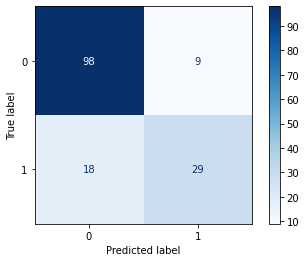

In [22]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);

in our confusion matrix the value of false positive and false negative value low so we can say our model is best.but from this only we cant say logistic is best than k-nearest one ans so on

## precision and recall --> if one inc and other will dic

In [23]:
#if we cahnge the desicion boundary means our classification will go wrong that will encounter by the above

precision--> TP/TP+FP It helps us to measure the ability to classify positive samples in the model.

In [24]:
metrics.precision_score(y_test, y_test_pred)

0.7631578947368421

Recall = TP/TP+FN It helps us to measure how many positive samples were correctly classified by the ML model.

In [25]:
metrics.recall_score(y_test, y_test_pred)

0.6170212765957447

## f1 score

like if we fit our model with high precision means our recall will be less and vice versa for that we use f1 score as summary that how well our model will perform?? 

f1 is a harmonic mean of precision and recall

summary: As mentioned before, precision is a metric to minimize false positive rate . On the other hand, recall is a metric to minimize false negative rate

F1 Score = 2 * (Recall*Precision) / (Recall + Precision)

In [26]:
metrics.f1_score(y_test, y_test_pred)

0.6823529411764706

adv: accuracy will include only true positive and true negative in its calc. but f1 all are taken into account thats why f1score is what we know than accuracy in classification

## sensitivity and specificity

sensitivity tells that at what percentage does our model correctly ideantify true positive i.e the diabetics in the patient


sens= tp/tp+fn

specificity on the other hand at what percentage that our model correctly identify the patient without diabetics i.e true negative


spec=tn/fp+tn


sensitivity=0.844 which is 84% and this tells that 84% of people with diabetics is correctly identified

specificity=0.76 which is 76% and this tells that 76% of people without diabetics is correctly identified

## misclassification rate

 misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.
 
Misclassification Rate =  incorrect predictions /  total predictions or Accuracy = 1 – Misclassification rate

summary:
Sensitivity: The “true positive rate” – the percentage of positive outcomes the model is able to detect.

Specificity: The “true negative rate” – the percentage of negative outcomes the model is able to detect.

F1 Score: A metric that tells us the accuracy of a model, relative to how the data is distributed.

In [27]:
1- metrics.accuracy_score(y_test, y_test_pred)

0.17532467532467533

## roc and auroc

there is something called threshold i.e prob=0.5 if the values greater than .5 means it is belog to one category and vice versa like by changing the threshold we can lower/higher the value of fp and fn so for sumarising that roc and auroc is used

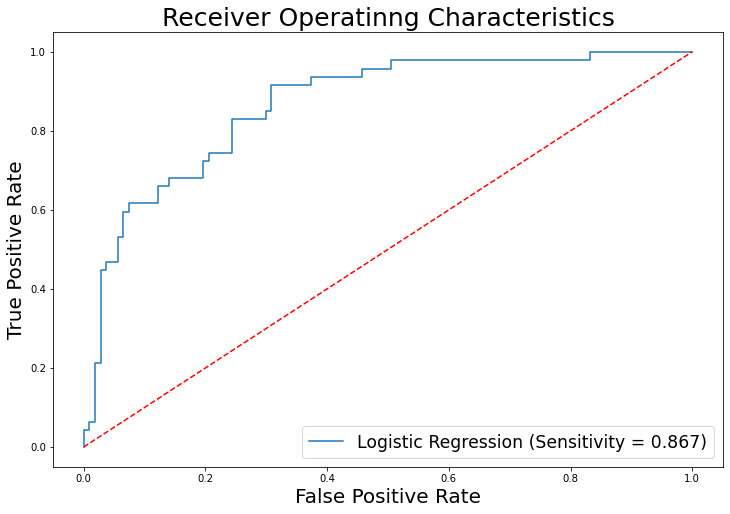

In [28]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()

roc--> b/w false +ve and true +ve rate

the line from 0,0 to 1,1 represent true positive rate=false positive rate and any point on the line represent the proportion of correctly classified diabetics is  same as the proporion of incorrectly classifies and some other point represent for different thresholds and the points represent the change of threshold and the 0,0 represent 0% of false positive and 0% true positive

and roc sumarises all of confusion matrix and with that we can find the optimal threshold for our data

auc(https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/) is area under the curve we can compare one ruc with other using auc(The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve).when AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

sometimes instead of false +ve rate we use precision if the no. of not positive is greater than positive

## Naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB


importing GaussianNB module from sklearn.naive_bayes because our data is  continous so we use gaussiannb

In [30]:
gnb = GaussianNB() 

initilising our model

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

splitting our data into training and testing so that we can know how good our model is for random datas 

In [33]:
gnb.fit(X_train, y_train)

GaussianNB()

here we fit our data into our model note we are passing our output too into our model

In [34]:
gnb.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

it gives the prediction for the remaing 20% of our data i.e for the model point of view it is random data

In [35]:
gnb.score(X_test, y_test)

0.7922077922077922

this is the accuracy of our model and here it is 79.22% that tells that our model classified 79% correctly

## Define which text preprocessing and text transformation steps did you usefor the above. 

Gaussian naive bayes should be used for our data set because of our data is of continous one so that it will take mean and var for its caculation